In [2]:
import numpy as np
import pandas as pd

data_raw = pd.read_parquet("vhrdata").drop_duplicates(subset=None, keep='last', inplace=False)
drop_columns = ["ebs_Q_Charge", "ebs_Q_Discharge", "BCM_ebs_I_BATT", "dcdc_OverTemperature","IC_LowBatteryvoltage", "DCDC_realInputVoltage", "DCDC_realInputCurrent"]
data_raw = data_raw.drop(columns=drop_columns)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156709 entries, 0 to 1156708
Data columns (total 46 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   vin                       1156709 non-null  object 
 1   collect_ts                1156709 non-null  int64  
 2   uuid                      1156709 non-null  object 
 3   model_name                1156709 non-null  object 
 4   series_code               1156709 non-null  object 
 5   msg_create_time           1156709 non-null  object 
 6   vcu_VehicleMode           1155798 non-null  float32
 7   vcu_vehicleSpeed          1155795 non-null  float32
 8   VCU_VehicleSpeedValid     1155795 non-null  float32
 9   vcu_state                 1156529 non-null  float32
 10  bms_SOC                   1153907 non-null  float32
 11  bms_state                 1156709 non-null  float32
 12  BCM_ebs_U_BATT            115129 non-null   float32
 13  BCM_ebs_SOC               1

In [ ]:
data_raw.head(20)

In [3]:
# 填充操作
data= data_raw[data_raw.vin == 'LM8F7D896NA007722'].fillna(method='ffill').sort_values(by="collect_ts")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111750 entries, 473190 to 740677
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   vin                       111750 non-null  object 
 1   collect_ts                111750 non-null  int64  
 2   uuid                      111750 non-null  object 
 3   model_name                111750 non-null  object 
 4   series_code               111750 non-null  object 
 5   msg_create_time           111750 non-null  object 
 6   vcu_VehicleMode           111750 non-null  float32
 7   vcu_vehicleSpeed          111750 non-null  float32
 8   VCU_VehicleSpeedValid     111750 non-null  float32
 9   vcu_state                 111750 non-null  float32
 10  bms_SOC                   111750 non-null  float32
 11  bms_state                 111750 non-null  float32
 12  BCM_ebs_U_BATT            111741 non-null  float32
 13  BCM_ebs_SOC               111741 non-null  f

In [7]:
data = data[(data["BCM_ebs_U_BATT"] > 3.) & (data["BCM_ebs_U_BATT"] < 18.)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111731 entries, 473190 to 740676
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   vin                       111731 non-null  object 
 1   collect_ts                111731 non-null  int64  
 2   uuid                      111731 non-null  object 
 3   model_name                111731 non-null  object 
 4   series_code               111731 non-null  object 
 5   msg_create_time           111731 non-null  object 
 6   vcu_VehicleMode           111731 non-null  float32
 7   vcu_vehicleSpeed          111731 non-null  float32
 8   VCU_VehicleSpeedValid     111731 non-null  float32
 9   vcu_state                 111731 non-null  float32
 10  bms_SOC                   111731 non-null  float32
 11  bms_state                 111731 non-null  float32
 12  BCM_ebs_U_BATT            111731 non-null  float32
 13  BCM_ebs_SOC               111731 non-null  f

In [ ]:
pd.DataFrame(data["BCM_ebs_U_BATT"].value_counts()).sort_values(by='BCM_ebs_U_BATT')

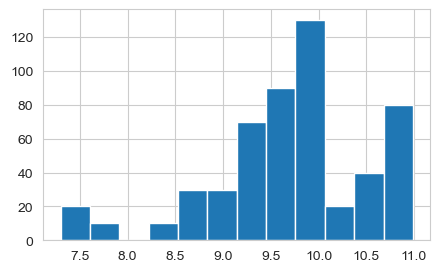

In [4]:
import matplotlib.pyplot as plt
data[(data["BCM_ebs_U_BATT"] > 3.) & (data["BCM_ebs_U_BATT"] < 11.)].BCM_ebs_U_BATT.hist(bins=12, figsize=(5,3))
plt.show()

In [8]:
data_copy = data.copy()

data_copy['date'] = pd.to_datetime(data_copy["collect_ts"], unit='ms')

data_copy = data_copy.set_index("date")
data_copy

,vin,collect_ts,uuid,model_name,series_code,msg_create_time,vcu_VehicleMode,vcu_vehicleSpeed,VCU_VehicleSpeedValid,vcu_state,...,bms_pLimitDrive,bms_pLimitRegen,bcm_HvOnRequest,esc_vehicleSpeed,esc_vehicleSpeedValid,ac_ambientTemp,ac_ambientTempValid,vcu_highVoltageIndicator,bcm_HvOffRequest,BCM_EBS_State
date,,,,,,,,,,,,,,,,,,,,,
2023-04-02 02:52:13.746,LM8F7D896NA007722,1680403933746,LM8F7D896NA007722#1682416473752#8763,赛力斯X1_2022_四驱性能版_B24ERF6EF3L00,SERES-X1,1682416473662,1.0,0.0,0.0,0.0,...,217.5,-95.5,0.0,460.743744,0.0,14.5,1.0,1.0,0.0,0.0
2023-04-02 02:52:14.746,LM8F7D896NA007722,1680403934746,LM8F7D896NA007722#1682416473752#8763,赛力斯X1_2022_四驱性能版_B24ERF6EF3L00,SERES-X1,1682416473662,1.0,0.0,0.0,0.0,...,217.5,-95.5,0.0,460.743744,0.0,14.5,1.0,1.0,0.0,0.0
2023-04-02 02:52:15.746,LM8F7D896NA007722,1680403935746,LM8F7D896NA007722#1682416473752#8763,赛力斯X1_2022_四驱性能版_B24ERF6EF3L00,SERES-X1,1682416473662,1.0,0.0,0.0,0.0,...,217.5,-95.5,0.0,460.743744,0.0,14.5,1.0,1.0,0.0,0.0
2023-04-02 02:52:16.746,LM8F7D896NA007722,1680403936746,LM8F7D896NA007722#1682416473752#8763,赛力斯X1_2022_四驱性能版_B24ERF6EF3L00,SERES-X1,1682416473662,1.0,0.0,0.0,0.0,...,217.5,-95.5,0.0,460.743744,0.0,14.5,1.0,1.0,0.0,0.0
2023-04-02 02:52:17.746,LM8F7D896NA007722,1680403937746,LM8F7D896NA007722#1682416473752#8763,赛力斯X1_2022_四驱性能版_B24ERF6EF3L00,SERES-X1,1682416473662,1.0,0.0,0.0,0.0,...,217.5,-95.5,0.0,460.743744,0.0,14.5,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-24 04:37:47.885,LM8F7D896NA007722,1682311067885,LM8F7D896NA007722#1682421436053#9141,赛力斯X1_2022_四驱性能版_B24ERF6EF3L00,SERES-X1,1682421435964,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,460.743744,0.0,18.0,1.0,0.0,0.0,0.0
2023-04-24 04:37:48.885,LM8F7D896NA007722,1682311068885,LM8F7D896NA007722#1682421436053#9141,赛力斯X1_2022_四驱性能版_B24ERF6EF3L00,SERES-X1,1682421435964,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,460.743744,0.0,18.0,1.0,0.0,0.0,0.0
2023-04-24 04:37:49.885,LM8F7D896NA007722,1682311069885,LM8F7D896NA007722#1682421436053#9141,赛力斯X1_2022_四驱性能版_B24ERF6EF3L00,SERES-X1,1682421435964,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,460.743744,0.0,18.0,1.0,0.0,0.0,0.0


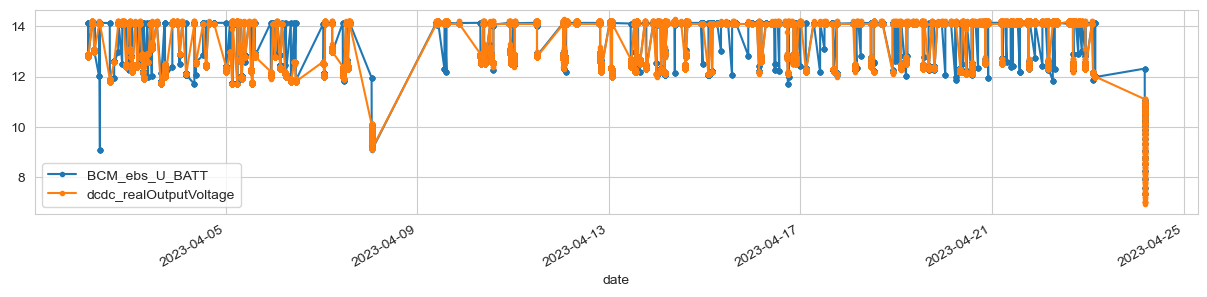

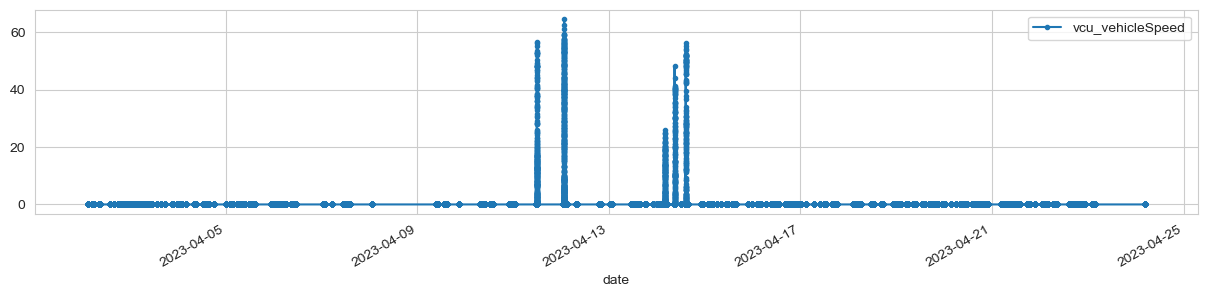

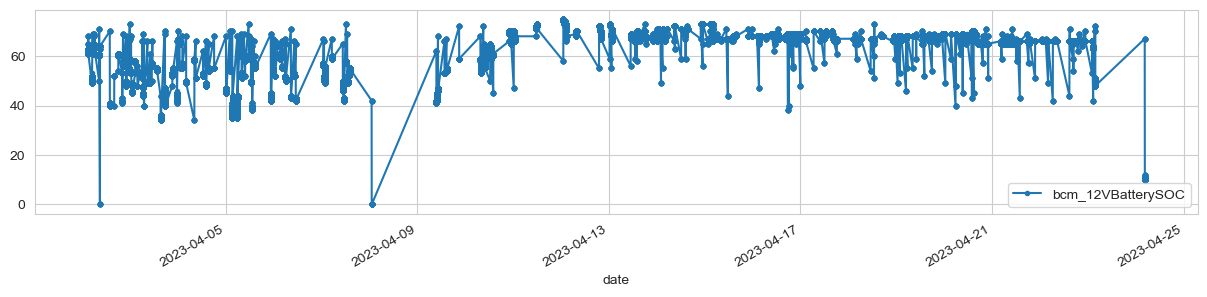

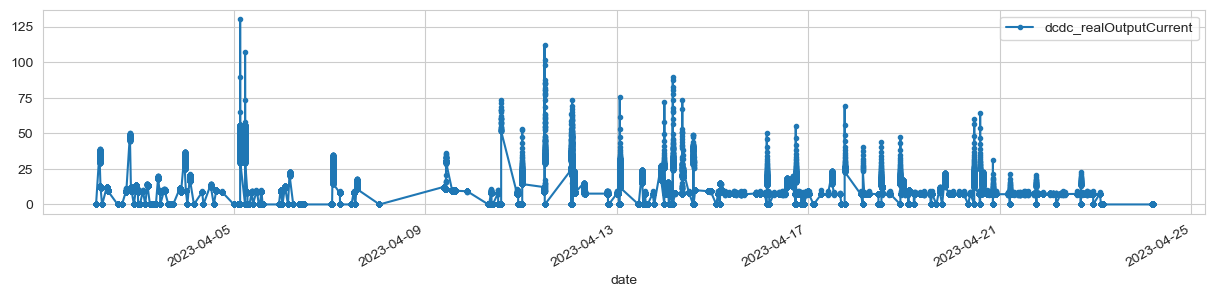

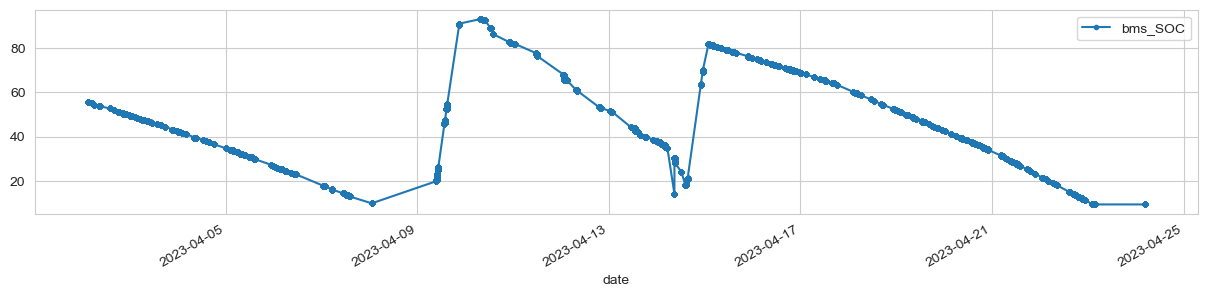

In [16]:
import matplotlib.pyplot as plt

data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))

data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["vcu_vehicleSpeed"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["bcm_12VBatterySOC"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["dcdc_realOutputCurrent"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-02 00:00:00":"2023-04-24 22:00:00"][["bms_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))

# extra code – saves the figure for the book
plt.show()

1. DC-DC 有输出的前提是高压上电
2. 当 DC-DC 有输出时，小电瓶电压会很快和其保持一致
3.

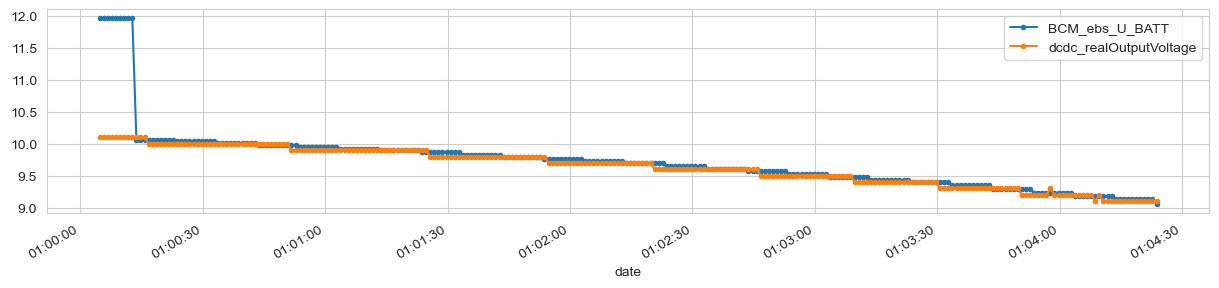

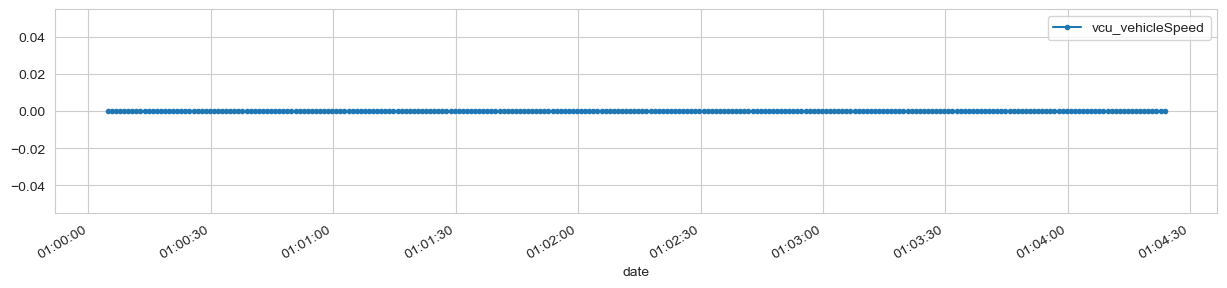

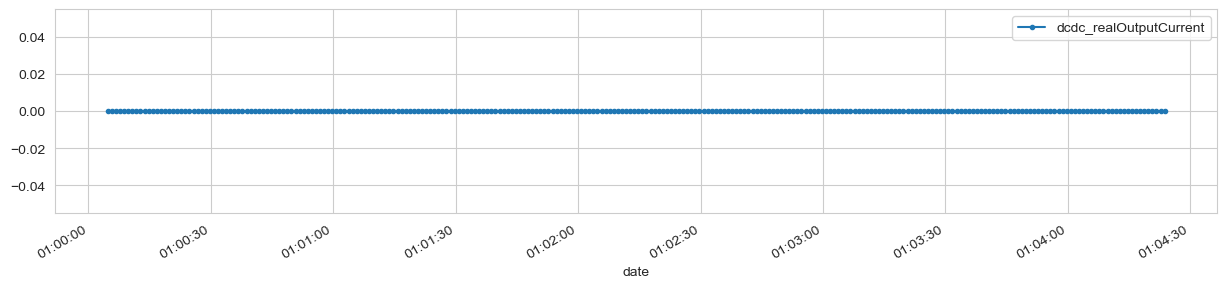

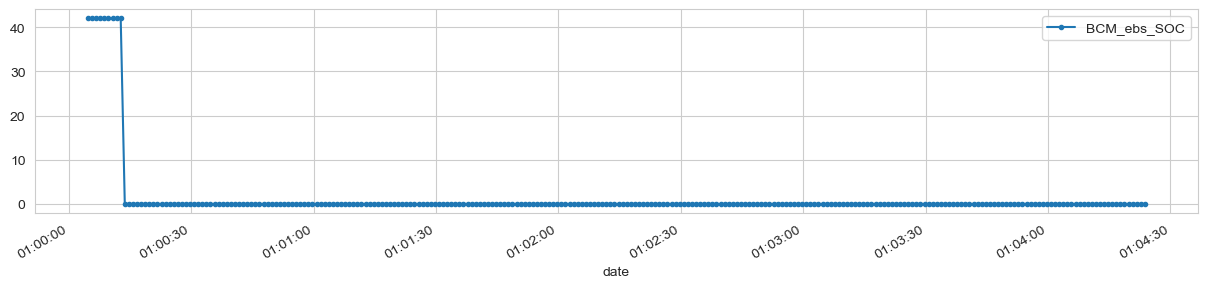

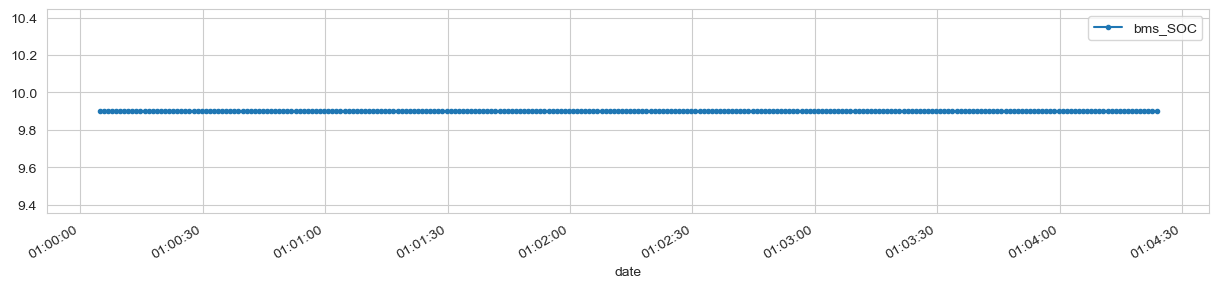

In [15]:
import matplotlib.pyplot as plt

data_copy["2023-04-08 00:00:00":"2023-04-09 09:10:00"][["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))

data_copy["2023-04-08 00:00:00":"2023-04-09 09:10:00"][["vcu_vehicleSpeed"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-08 00:00:00":"2023-04-09 09:10:00"][["dcdc_realOutputCurrent"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-08 00:00:00":"2023-04-09 09:10:00"][["BCM_ebs_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-08 00:00:00":"2023-04-09 09:10:00"][["bms_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))

# extra code – saves the figure for the book
plt.show()

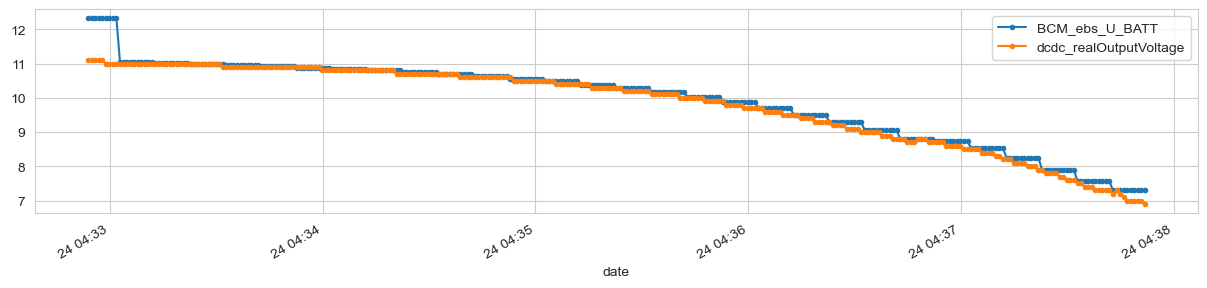

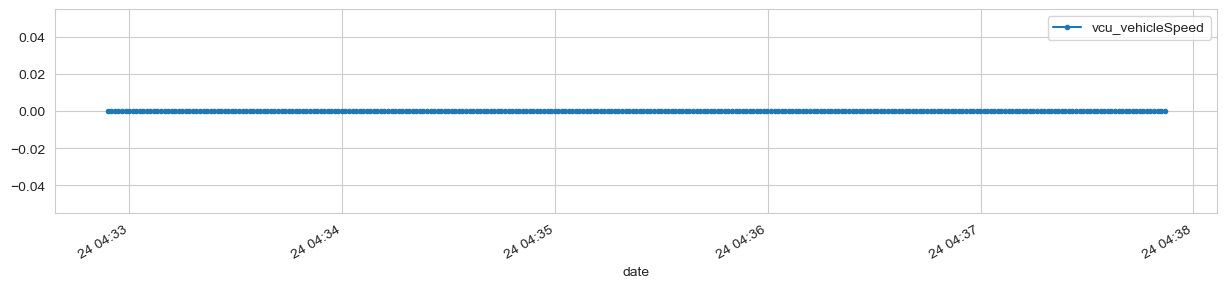

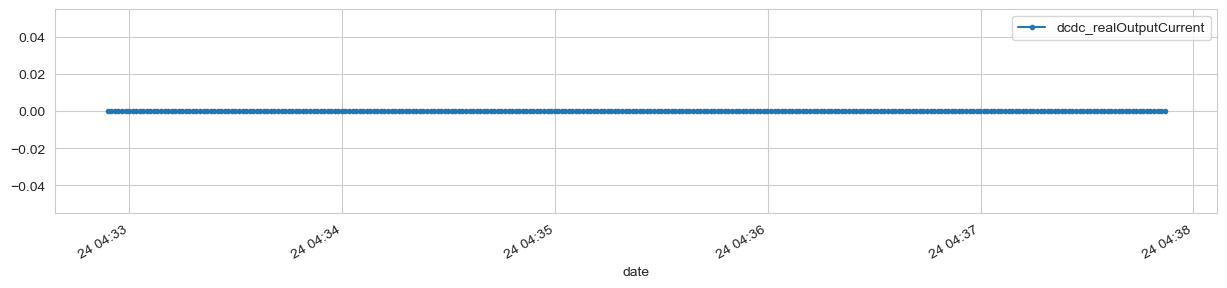

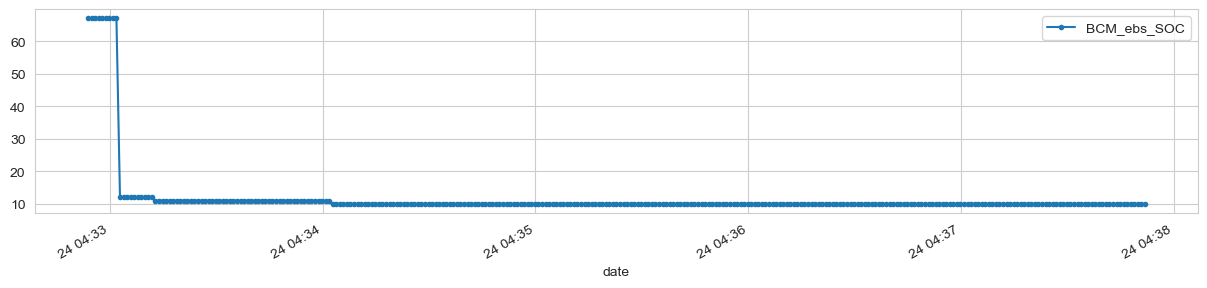

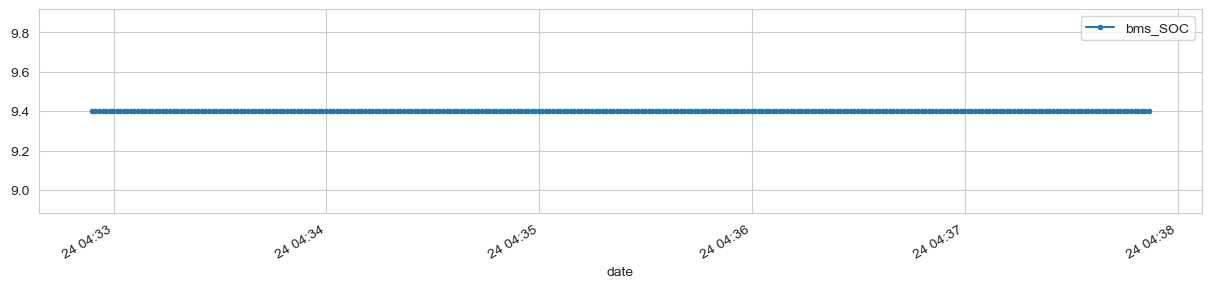

In [14]:
import matplotlib.pyplot as plt

data_copy["2023-04-24 00:00:00":"2023-04-26 09:10:00"][["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))

data_copy["2023-04-24 00:00:00":"2023-04-26 09:10:00"][["vcu_vehicleSpeed"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-24 00:00:00":"2023-04-26 09:10:00"][["dcdc_realOutputCurrent"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-24 00:00:00":"2023-04-26 09:10:00"][["BCM_ebs_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))
data_copy["2023-04-24 00:00:00":"2023-04-26 09:10:00"][["bms_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))

# extra code – saves the figure for the book
plt.show()